In [1]:
import os
import glob
import numpy as np
import pandas as pd
from scipy.io import loadmat
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from tqdm import tqdm

# info = pd.read_csv("G:/Data/Supplementaries/zebel-paired.csv")

In [2]:
def movavg(inp, bl, ss):
    nbin = int(np.floor((inp.shape[2] - bl) / ss))
    out = np.nan * np.zeros((inp.shape[0], inp.shape[1], nbin))
    for ibin in range(nbin):
        out[:, :, ibin] = np.sum(inp[:, :, int(ibin*ss):int(ibin*ss)+bl], 2) / bl * 1000
    return out

# Split Half Data

In [ ]:
def read_neuron(path):
    cm = loadmat(os.path.join(os.path.dirname(path), 'cm.mat'))['cm']
    nstim = np.unique(cm).max()
    
    nsample = 900
    data = np.nan * np.zeros([nstim, 1, nsample])
    
    ua = loadmat(path)['ua']
    cm = cm[:ua.shape[0]]
    
    split_1, split_2 = [], []
    for istim in np.arange(1, 166):
        X = ua[(cm==istim).flatten(), :]
        nrep = X.shape[0]
        
        first_half = X[:int(nrep/2), :]
        second_half = X[int(nrep/2):, :]

        split_1.append(first_half.mean(0))
        split_2.append(second_half.mean(0))
    
    if nrep < 3:
        print(path)
    return np.array(split_1), np.array(split_2)

In [ ]:
monkey = "jenab"
select = "fast"

info = pd.read_csv(f'/Data/{select.capitalize()}/{monkey.capitalize()}/itcNeuralInfo.csv')

split1, split2 = [], []
for row in info.iterrows():
    spl1, spl2 = read_neuron(row[1][0])
    split1.append(spl1)
    split2.append(spl2)

split1 = np.transpose(split1, [1, 0, 2])
split2 = np.transpose(split2, [1, 0, 2])

np.save(f"G:/Data/Fast/{monkey.capitalize()}/itc-half-split-1.npy", split1)
np.save(f"G:/Data/Fast/{monkey.capitalize()}/itc-half-split-2.npy", split2)

In [ ]:
monkey = "jenab"
select = "fast"

info = pd.read_csv(f'/Data/{select.capitalize()}/{monkey.capitalize()}/pfcNeuralInfo.csv')

split1, split2 = [], []
for row in info.iterrows():
    spl1, spl2 = read_neuron(row[1][0])
    split1.append(spl1)
    split2.append(spl2)

split1 = np.transpose(split1, [1, 0, 2])
split2 = np.transpose(split2, [1, 0, 2])

np.save(f'G:/Data/Fast/{monkey.capitalize()}/pfc-half-split-1.npy', split1)
np.save(f'G:/Data/Fast/{monkey.capitalize()}/pfc-half-split-2.npy', split2)

In [ ]:
monkey = "zebel"
select = "fast"

info = pd.read_csv(f'/Data/{select.capitalize()}/{monkey.capitalize()}/itcNeuralInfo.csv')

split1, split2 = [], []
for row in info.iterrows():
    spl1, spl2 = read_neuron(row[1][0])
    split1.append(spl1)
    split2.append(spl2)

split1 = np.transpose(split1, [1, 0, 2])
split2 = np.transpose(split2, [1, 0, 2])

np.save(f'G:/Data/Fast/{monkey.capitalize()}/itc-half-split-1.npy', split1)
np.save(f'G:/Data/Fast/{monkey.capitalize()}/itc-half-split-2.npy', split2)

In [ ]:
monkey = "zebel"
select = "fast"

info = pd.read_csv(f'/Data/{select.capitalize()}/{monkey.capitalize()}/pfcNeuralInfo.csv')

split1, split2 = [], []
for row in info.iterrows():
    spl1, spl2 = read_neuron(row[1][0])
    split1.append(spl1)
    split2.append(spl2)

split1 = np.transpose(split1, [1, 0, 2])
split2 = np.transpose(split2, [1, 0, 2])

np.save(f'G:/Data/Fast/{monkey.capitalize()}/pfc-half-split-1.npy', split1)
np.save(f'G:/Data/Fast/{monkey.capitalize()}/pfc-half-split-2.npy', split2)

# Jenab - Fast

In [3]:
def visual_drive(neuron):
    time = np.arange(-200, 650) + 25
    gray   = neuron[:, (time < 0) & (time > -50)].mean(1)
    images = neuron[:, (time > 150) & (time < 200)].mean(1)
    sigma_images = images.std()
    sigma_gray   = gray.std()

    dprime = (images.mean() - gray.mean()) / np.sqrt(0.5 * (sigma_gray ** 2 + sigma_images ** 2))
    return dprime

In [31]:
def read_neuron_split(path):
    cm = loadmat(os.path.join(os.path.dirname(path), 'cm.mat'))['cm']
    nstim = np.unique(cm).max()
    
    nsample = 900
    data = np.nan * np.zeros([nstim, 1, nsample])
    
    ua = loadmat(path)['ua']
    cm = cm[:ua.shape[0]]
    
    split_1, split_2 = [], []
    for istim in np.arange(1, 166):
        X = ua[(cm==istim).flatten(), :]
        X = X[np.random.permutation(X.shape[0]).flatten(), :]
        nrep = X.shape[0]
        
        first_half = X[:int(nrep/2), :]
        second_half = X[int(nrep/2):, :]

        split_1.append(first_half.mean(0))
        split_2.append(second_half.mean(0))
    
    # if nrep < 3:
        # print(path)
    return np.array(split_1), np.array(split_2)

In [68]:
def split_half_reliability(region):
    time = np.arange(-200, 700)
    # split1 = np.load(f"G:/Data/Fast/Jenab/{region}-half-split-1.npy")
    # split2 = np.load(f"G:/Data/Fast/Jenab/{region}-half-split-2.npy")

    info = pd.read_csv(f'/Data/Fast/{monkey.capitalize()}/{region}NeuralInfo.csv')

    out = []
    for _ in tqdm(range(3)):
        split1, split2 = [], []
        for row in info.iterrows():
            spl1, spl2 = read_neuron_split(row[1][0])
            split1.append(spl1)
            split2.append(spl2)

        split1 = np.transpose(split1, [1, 0, 2])
        split2 = np.transpose(split2, [1, 0, 2])

        reliability = []
        for iit in range(split1.shape[1]):
            try:
                neuron_s1, neuron_s2 = split1[:, iit, :], split2[:, iit, :]
                
                r, p = pearsonr(neuron_s1[:, (time > 100) & (time < 150)].mean(1), 
                                neuron_s2[:, (time > 100) & (time < 150)].mean(1))
                shtr = 2 * r / (1 + r)
            except Exception as e:
                # print(e)
                shtr = 0
            reliability.append(shtr)
        reliability = np.array(reliability)
        out.append(reliability)
    return np.array(out)
    

In [33]:
def read_neuron(path):    
    cm = loadmat(os.path.join(os.path.dirname(path), 'cm.mat'))['cm']
    nstim = np.unique(cm).max()
    
    nsample = 900
    data = np.nan * np.zeros([nstim, 1, nsample])
    
    ua = loadmat(path)['ua']
    cm = cm[:ua.shape[0]]
    for istim in np.arange(1, nstim + 1, 1):
        data[istim-1, 0, :] = ua[(cm == istim).squeeze(), :].mean(0)
        
    return movavg(data, 50, 1)

In [3]:
def read_neuron_no_avg(path):    
    cm = loadmat(os.path.join(os.path.dirname(path), 'cm.mat'))['cm']
    nstim = np.unique(cm).max()
    
    nsample = 900
    data = np.nan * np.zeros([nstim, 1, nsample])
    
    ua = loadmat(path)['ua']
    cm = cm[:ua.shape[0]]
    for istim in np.arange(1, nstim + 1, 1):
        data[istim-1, 0, :] = ua[(cm == istim).squeeze(), :].mean(0)
        
    return data

In [8]:
for monkey in ["jenab", "zebel"]:
    for region in ["itc", "pfc"]:
        info = pd.read_csv(f"/Data/Fast/{monkey.capitalize()}/{region}NeuralInfo.csv")

        data = []
        for row in info.iterrows():
            data.append(read_neuron_no_avg(row[1][0]))

        data = np.transpose(np.array(data).squeeze(), [1, 0, 2])
        np.save(f"G:/Data/Fast/{monkey.capitalize()}/{region.upper()}NoAvg.npy", data)

In [9]:
itc_z = np.load('G:/Data/Fast/Zebel/ITCNoAvg.npy')
itc_j = np.load('G:/Data/Fast/Jenab/ITCNoAvg.npy')
itc_z = itc_z[:itc_j.shape[0], :, :]

itc = np.concatenate([itc_z, itc_j], axis=1)

np.save('G:/Data/Fast/Both/ITCNoAvg.npy', itc)

In [10]:
pfc_z = np.load('G:/Data/Fast/Zebel/PFCNoAvg.npy')
pfc_j = np.load('G:/Data/Fast/Jenab/PFCNoAvg.npy')
pfc_z = pfc_z[:pfc_j.shape[0], :, :]

pfc = np.concatenate([pfc_z, pfc_j], axis=1)

np.save('G:/Data/Fast/Both/PFCNoAvg.npy', pfc)

In [6]:
data.shape

(165, 268, 900)

In [52]:
monkey = "jenab"
region = 'pfc'

info = pd.read_csv(f"/Data/Fast/{monkey.capitalize()}/{region}NeuralInfo.csv")

data = []
for row in info.iterrows():
    data.append(read_neuron(row[1][0]))

data = np.transpose(np.array(data).squeeze(), [1, 0, 2])
np.save(f"G:/Data/Fast/{monkey.capitalize()}/{region}.npy", data)

vd = []
for ineuron in range(data.shape[1]):
    vd.append(visual_drive(data[:, ineuron, :]))

sh = split_half_reliability(region=region).mean(0)

vdIdx = (np.array(vd) > .6).flatten()
shIdx = (sh > .6).flatten()

(data.shape[1], vdIdx.sum(), shIdx.sum())
np.save(f"G:/Data/Fast/{monkey.capitalize()}/{region.upper()}S.npy", data[:, vdIdx & shIdx, :])

  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\User\AppData\Local\Temp/ipykernel_18840/2017250244.py:20: RuntimeWarning: Mean of empty slice.
  split_1.append(first_half.mean(0))
c:\Users\User\anaconda3\envs\ipm\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
100%|██████████| 3/3 [00:12<00:00,  4.17s/it]


In [54]:
data.shape[1], vdIdx.sum(), shIdx.sum()

(209, 33, 0)

51


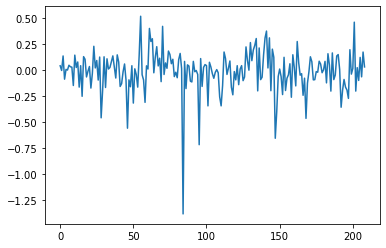

In [65]:
print((sh > 0.1).sum())
plt.plot(sh)

In [ ]:
monkey = "jenab"
region = 'itc'

info = pd.read_csv(f"/Data/Fast/{monkey.capitalize()}/{region}NeuralInfo.csv")

data = []
for row in info.iterrows():
    data.append(read_neuron(row[1][0]))

data = np.transpose(np.array(itc).squeeze(), [1, 0, 2])
np.save(f"G:/Data/Fast/Jenab/{region}.npy", data)

In [ ]:
vdIdx = 

In [ ]:
monkey = "jenab"
region = 'itc'

info = pd.read_csv(f"/Data/Fast/{monkey.capitalize()}/{region}NeuralInfo.csv")

data = []
for row in info.iterrows():
    data.append(read_neuron(row[1][0]))

data = np.transpose(np.array(itc).squeeze(), [1, 0, 2])
np.save(f"G:/Data/Fast/Jenab/{region}.npy", data)

In [ ]:
info = pd.read_csv('/Data/Fast/Jenab/pfcNeuralInfo.csv')

pfc = []
for row in info.iterrows():
    pfc.append(read_neuron(row[1][0]))

pfc = np.transpose(np.array(pfc).squeeze(), [1, 0, 2])

In [ ]:
np.save('G:/Data/Fast/Jenab/PFC.npy', pfc)

In [ ]:
time = np.arange(-200, 650) + 25
vd = []
for iit in range(itc.shape[1]):
    vd.append(visual_drive(time, itc[:, iit, :]))
vdIdx = (np.array(vd) > .6).flatten()

split1 = np.load('G:/Data/Fast/Jenab/itc-half-split-1.npy')
split2 = np.load('G:/Data/Fast/Jenab/itc-half-split-2.npy')

time = np.arange(-200, 700)

reliability = []
for iit in range(split1.shape[1]):
    try:
        neuron_s1, neuron_s2 = split1[:, iit, :], split2[:, iit, :]
        
        r, p = pearsonr(neuron_s1[:, (time > 100) & (time < 150)].mean(1), 
                        neuron_s2[:, (time > 100) & (time < 150)].mean(1))
        shtr = 2 * r / (1 + r)
    except Exception as e:
        print(e)
        shtr = 0
    reliability.append(shtr)

shIdx = (np.array(reliability) > .1).flatten()

np.save('G:/Data/Fast/Jenab/ITCS.npy', itc[:, vdIdx & shIdx, :])

In [ ]:
time = np.arange(-200, 650) + 25
vd = []
for ipfc in range(pfc.shape[1]):
    vd.append(visual_drive(time, pfc[:, ipfc, :]))
vdIdx = (np.array(vd) > .6).flatten()

split1 = np.load('G:/Data/Fast/Jenab/pfc-half-split-1.npy')
split2 = np.load('G:/Data/Fast/Jenab/pfc-half-split-2.npy')

time = np.arange(-200, 700)

reliability = []
for ipfc in range(split1.shape[1]):
    try:
        neuron_s1, neuron_s2 = split1[:, ipfc, :], split2[:, ipfc, :]
        
        r, p = pearsonr(neuron_s1[:, (time > 100) & (time < 150)].mean(1), 
                        neuron_s2[:, (time > 100) & (time < 150)].mean(1))
        shtr = 2 * r / (1 + r)
    except Exception as e:
        print(e)
        shtr = 0
    reliability.append(shtr)

shIdx = (np.array(reliability) > .1).flatten()

np.save('G:/Data/Fast/Jenab/PFCS.npy', pfc[:, vdIdx & shIdx, :])

# Zebel - Fast

In [ ]:
def read_neuron(path):    
    cm = loadmat(os.path.join(os.path.dirname(path), 'cm.mat'))['cm']
    nstim = np.unique(cm).max()
    
    nsample = 900
    data = np.nan * np.zeros([nstim, 1, nsample])
    
    ua = loadmat(path)['ua']
    cm = cm[:ua.shape[0]]
    for istim in np.arange(1, nstim + 1, 1):
        data[istim-1, 0, :] = ua[(cm == istim).squeeze(), :].mean(0)
        
    return movavg(data, 50, 1)

In [ ]:
info = pd.read_csv('/Data/Fast/Zebel/itcNeuralInfo.csv')

itc = []
for row in info.iterrows():
    itc.append(read_neuron(row[1][0]))

itc = np.transpose(np.array(itc).squeeze(), [1, 0, 2])

In [ ]:
info = pd.read_csv('/Data/Fast/Zebel/pfcNeuralInfo.csv')

pfc = []
for row in info.iterrows():
    pfc.append(read_neuron(row[1][0]))

pfc = np.transpose(np.array(pfc).squeeze(), [1, 0, 2])

In [ ]:
np.save('G:/Data/Fast/Zebel/ITC.npy', itc)
np.save('G:/Data/Fast/Zebel/PFC.npy', pfc)

In [ ]:
def visual_drive(time, neuron):
    gray   = neuron[:, (time < 0) & (time > -50)].mean(1)
    images = neuron[:, (time > 150) & (time < 200)].mean(1)
    sigma_images = images.std()
    sigma_gray   = gray.std()

    dprime = (images.mean() - gray.mean()) / np.sqrt(0.5 * (sigma_gray ** 2 + sigma_images ** 2))
    return dprime

# Both - Fast

In [ ]:
itc_z = np.load('G:/Data/Fast/Zebel/ITC.npy')
itc_j = np.load('G:/Data/Fast/Jenab/ITC.npy')
itc_z = itc_z[:itc_j.shape[0], :, :]

itc = np.concatenate([itc_z, itc_j], axis=1)

np.save('G:/Data/Fast/Both/ITC.npy', itc)

In [ ]:
pfc_z = np.load('G:/Data/Fast/Zebel/PFC.npy')
pfc_j = np.load('G:/Data/Fast/Jenab/PFC.npy')
pfc_z = pfc_z[:pfc_j.shape[0], :, :]

pfc = np.concatenate([pfc_z, pfc_j], axis=1)

np.save('G:/Data/Fast/Both/PFC.npy', pfc)

# Jenab - Slow

In [ ]:
def read_neuron(path):    
    cm = loadmat(os.path.join(os.path.dirname(path), 'cm.mat'))['cm']
    nstim = np.unique(cm).max()
    
    nsample = 1200
    data = np.nan * np.zeros([nstim, 1, nsample])
    
    ua = loadmat(path)['ua']
    cm = cm[:ua.shape[0]]
    for istim in np.arange(1, nstim + 1, 1):
        data[istim-1, 0, :] = ua[(cm == istim).squeeze(), :].mean(0)
        
    return movavg(data, 50, 1)

In [ ]:
info = pd.read_csv('/Data/Slow/Jenab/itcNeuralInfo.csv')
itc = []
for row in info.iterrows():
    itc.append(read_neuron(row[1][0]))
itc = np.transpose(np.array(itc).squeeze(), [1, 0, 2])

info = pd.read_csv('/Data/Slow/Jenab/pfcNeuralInfo.csv')
pfc = []
for row in info.iterrows():
    pfc.append(read_neuron(row[1][0]))
pfc = np.transpose(np.array(pfc).squeeze(), [1, 0, 2])

In [ ]:
np.save('G:/Data/Slow/Jenab/ITC.npy', itc)
np.save('G:/Data/Slow/Jenab/PFC.npy', pfc)

# Zebel - Slow

In [ ]:
def read_neuron(path):    
    cm = loadmat(os.path.join(os.path.dirname(path), 'cm.mat'))['cm']
    nstim = np.unique(cm).max()
    
    nsample = 1200
    data = np.nan * np.zeros([nstim, 1, nsample])
    
    ua = loadmat(path)['ua']
    cm = cm[:ua.shape[0]]
    for istim in np.arange(1, nstim + 1, 1):
        data[istim-1, 0, :] = ua[(cm == istim).squeeze(), :].mean(0)
        
    return movavg(data, 50, 1)

In [ ]:
info = pd.read_csv('/Data/Slow/Zebel/itcNeuralInfo.csv')
itc = []
for row in info.iterrows():
    itc.append(read_neuron(row[1][0]))
itc = np.transpose(np.array(itc).squeeze(), [1, 0, 2])

info = pd.read_csv('/Data/Slow/Zebel/pfcNeuralInfo.csv')
pfc = []
for row in info.iterrows():
    pfc.append(read_neuron(row[1][0]))
pfc = np.transpose(np.array(pfc).squeeze(), [1, 0, 2])

In [ ]:
np.save('G:/Data/Slow/Zebel/ITC.npy', itc)
np.save('G:/Data/Slow/Zebel/PFC.npy', pfc)

# Both - Slow

In [ ]:
itc_z = np.load('G:/Data/Slow/Zebel/ITC.npy')
itc_j = np.load('G:/Data/Slow/Jenab/ITC.npy')
itc_z = itc_z[:itc_j.shape[0], :, :]

itc = np.concatenate([itc_z, itc_j], axis=1)

np.save('G:/Data/Slow/Both/ITC.npy', itc)

In [ ]:
pfc_z = np.load('G:/Data/Slow/Zebel/PFC.npy')
pfc_j = np.load('G:/Data/Slow/Jenab/PFC.npy')
pfc_z = pfc_z[:pfc_j.shape[0], :, :]

pfc = np.concatenate([pfc_z, pfc_j], axis=1)

np.save('G:/Data/Slow/Both/PFC.npy', pfc)

# Zebel - Pair

In [ ]:
def read_session(path):
    fpath = os.path.join(path, 'Trial')
    
    cm = loadmat(os.path.join(fpath, 'cm.mat'))['cm']
    nstim = np.unique(cm).max()
    
    nsample = loadmat(os.path.join(fpath, 'mu_it.mat'))['ua'].shape[1]
    it = np.nan * np.zeros([nstim, len(list(glob.iglob(f'{fpath}/*_it*.mat'))), nsample])
    
    for i, u in enumerate(glob.iglob(f'{fpath}/*_it*.mat')):
        ua = loadmat(u)['ua']
        cm = cm[:ua.shape[0]]
        for istim in np.arange(1, nstim + 1, 1):
            it[istim-1, i, :] = ua[(cm == istim).squeeze(), :].mean(0)

    pfc = np.nan * np.zeros([nstim, len(list(glob.iglob(f'{fpath}/*pfc*.mat'))), nsample])
    for i, u in enumerate(glob.iglob(f'{fpath}/*pfc*.mat')):
        ua = loadmat(u)['ua']
        cm = cm[:ua.shape[0]]
        for istim in np.arange(1, nstim + 1, 1):
            pfc[istim-1, i, :] = ua[(cm == istim).squeeze(), :].mean(0)
        
    return cm, movavg(it, 50, 1), movavg(pfc, 50, 1)

In [ ]:
monkey = "Zebel"
it, pfc = [], []
for r in info.iterrows():
    cm, it_, pfc_ = read_session(os.path.join(f"G:/Data/Slow/{monkey}", r[1][0]))
    it.append(it_)
    pfc.append(pfc_)

it = np.concatenate(it, axis=1)
pfc = np.concatenate(pfc, axis=1)

slow = {'it': it, 'pfc': pfc}

it, pfc = [], []
for r in info.iterrows():
    cm, it_, pfc_ = read_session(os.path.join(f"G:/Data/Fast/{monkey}", r[1][1]))
    it.append(it_)
    pfc.append(pfc_)

it = np.concatenate(it, axis=1)
pfc = np.concatenate(pfc, axis=1)

fast = {'it': it, 'pfc': pfc}

In [ ]:
np.save('G:/Data/Paired/Zebel/slow-it.npy', slow['it'])
np.save('G:/Data/Paired/Zebel/fast-it.npy', fast['it'])
np.save('G:/Data/Paired/Zebel/slow-pfc.npy', slow['pfc'])
np.save('G:/Data/Paired/Zebel/fast-pfc.npy', fast['pfc'])